https://www.kaggle.com/datasets/pradeeshprabhakar/preprocessed-dataset-sentiment-analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import re

> # Exploration des données

In [33]:
train = pd.read_csv("twitter_training.csv", names= ['ID', 'Entity', 'Sentiment', 'Tweet'])
test = pd.read_csv("twitter_validation.csv", names= ['ID', 'Entity', 'Sentiment', 'Tweet'])

In [34]:
df = pd.concat([train,test])
df.reset_index(inplace=True,drop = True)

In [35]:
df = df.drop('ID', axis=1)

In [36]:
display(df.head(5))
display(df.tail(5))

,Entity,Sentiment,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


,Entity,Sentiment,Tweet
75677,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
75681,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [37]:
print('Info (df)')
df.info()


Info (df)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     75682 non-null  object
 1   Sentiment  75682 non-null  object
 2   Tweet      74996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [38]:
print(f"(df) Sentiment:\n{df['Sentiment'].value_counts()}")


(df) Sentiment:
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: Sentiment, dtype: int64


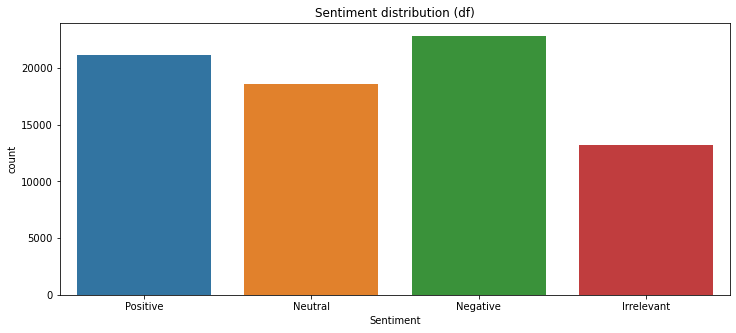

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['Sentiment']);
plt.title("Sentiment distribution (df)");


Text(0.5, 1.0, 'Entity distribution (df)')

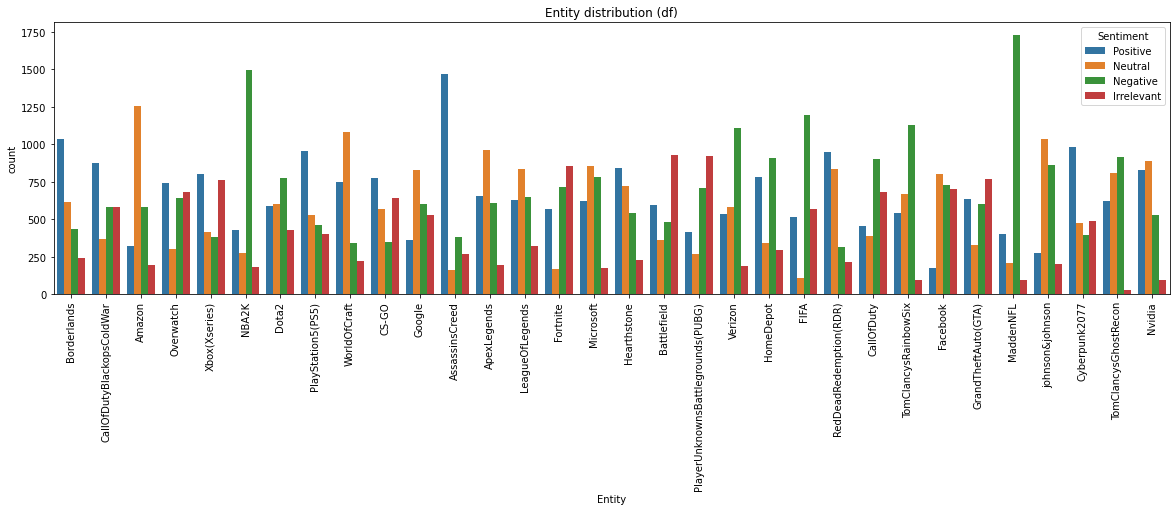

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(x = df['Entity'], hue=df['Sentiment']);
plt.xticks(rotation = 90)
plt.title("Entity distribution (df)")


In [41]:
display(pd.DataFrame(np.round(df['Sentiment'].value_counts()/len(df)*100,1)),"Sentiment distribution (df)") 



,Sentiment
Negative,30.1
Positive,27.9
Neutral,24.6
Irrelevant,17.4


'Sentiment distribution (df)'

> # Data Cleaning
> ### On regarde s'il y a des doublons

In [42]:
print(f'Duplicated (df.Tweet): {df["Tweet"].duplicated().sum()}')

Duplicated (df.Tweet): 5707


In [43]:
df = df.drop_duplicates(subset=['Tweet'])

> **On verifie**

In [44]:
print(f'Duplicated (df.Tweet): {df["Tweet"].duplicated().sum()}')

Duplicated (df.Tweet): 0


> ### On regarde si'il y a des valeurs manquantes

In [45]:
display(pd.DataFrame(df.isna().sum(), columns=['NaN(s) (df)']))


,NaN(s) (df)
Entity,0
Sentiment,0
Tweet,1


In [46]:
df = df.dropna(axis=0).reset_index(drop = True)

>**On Vérifie**

In [47]:
display(pd.DataFrame(df.isna().sum(), columns=['NaN(s) (df)']))

,NaN(s) (df)
Entity,0
Sentiment,0
Tweet,0


># StopWords

In [48]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilienbonhomme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop_words = stopwords.words('english')

In [50]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
import re

In [52]:
word_counts = {'Positive': [],
              'Negative': [],
              'Neutral': [],
              'Irrelevant': []}

pattern = re.compile('[^\w ]')

for sentiment, tweet in zip(df.Sentiment, df.Tweet):
    tweet = re.sub(pattern, '', tweet).lower().split()
    tweet = [mot for mot in tweet if mot not in stop_words]
    word_counts[sentiment].extend(tweet)

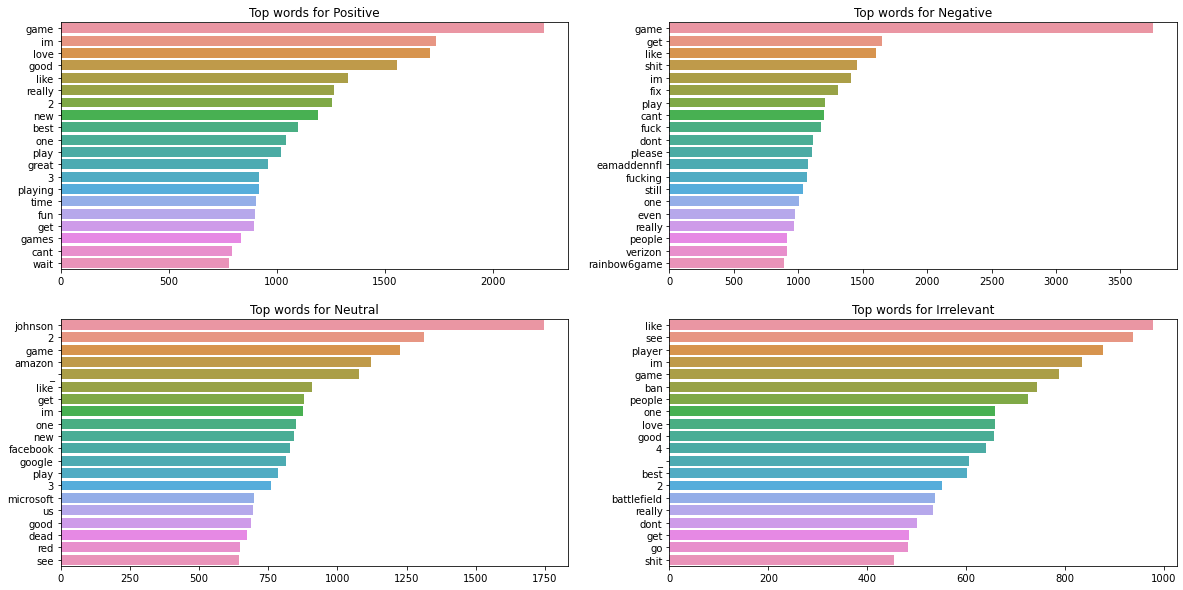

In [53]:
count = 0
plt.figure(figsize=(20,10))
for (sentiment, words) in word_counts.items():
    count+=1
    plt.subplot(2,2,count)
    bar_info = pd.Series(words).value_counts()[:20]
    sns.barplot(x=bar_info.values, y=bar_info.index)
    plt.title(f'Top words for {sentiment}')
plt.show()


># Nuages de mots (wordclouds)

In [54]:
df_sentiment_cat = {}

for index, cat in enumerate(df['Sentiment'].unique()):
    df_sentiment_cat[cat] = df['Tweet'][df['Sentiment'] == cat]
    


In [55]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [56]:
from wordcloud import WordCloud

In [57]:
def WordCloud_Function(title,data):
        text = ""
        for word in data.values : 
            text += word

        # Définir le calque du nuage des mots
        wc = WordCloud(background_color="white", 
                       max_words=100,
                       stopwords=stop_words,
                       max_font_size=50,
                       random_state=42)
        plt.figure(figsize= (8,6))
        wc.generate(text)
        plt.title(title+'_Sentiment')
        plt.imshow(wc)
        plt.show()

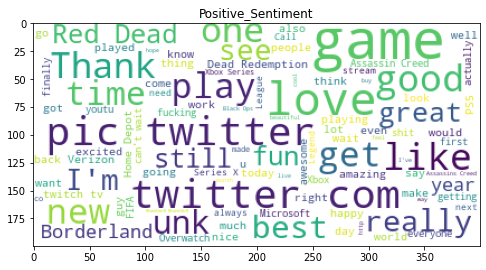

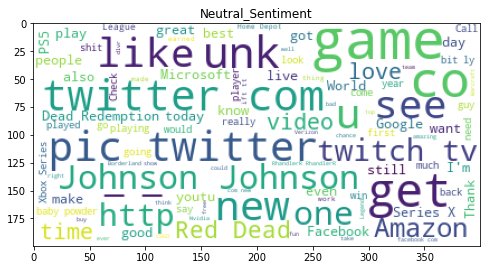

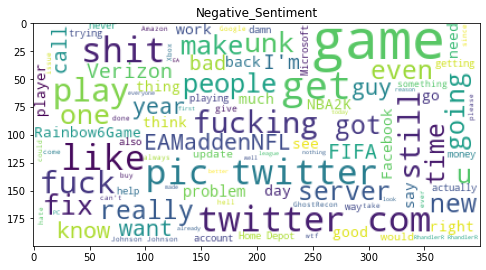

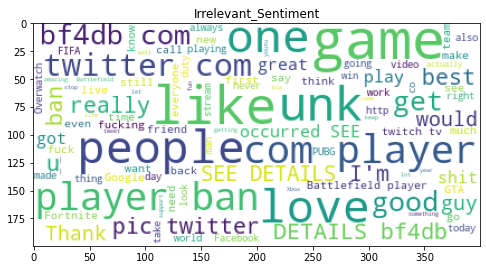

In [58]:
for key, value in df_sentiment_cat.items():
    WordCloud_Function(key,value)

># Data Preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop('Sentiment',axis=1)
y = df['Sentiment']

>### Suppression des stopwords

In [192]:
X['Tweet'] = X['Tweet'].replace('[^\w.]', ' ',regex=True)
X['Tweet'] = X['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [193]:
from nltk.stem import WordNetLemmatizer

In [194]:
lemmatizer = WordNetLemmatizer()

X['Tweet'] = [' '.join([lemmatizer.lemmatize(word) for word in x.split()]) for x in X['Tweet']]

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False)
X_tfidf = tfidf_vectorizer.fit_transform(X['Tweet'])

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.2, random_state=0)

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [200]:
from time import time

Classe predite  Irrelevant  Negative  Neutral  Positive
Classe réelle                                          
Irrelevant            2146        90       67       148
Negative                20      4137       69        91
Neutral                 25       122     3140        98
Positive                35       113       78      3616 

-----------------------------------
              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92      2451
    Negative       0.93      0.96      0.94      4317
     Neutral       0.94      0.93      0.93      3385
    Positive       0.91      0.94      0.93      3842

    accuracy                           0.93     13995
   macro avg       0.94      0.93      0.93     13995
weighted avg       0.93      0.93      0.93     13995

-----------------------------------
Temps de Calcul: 3783.5 secondes


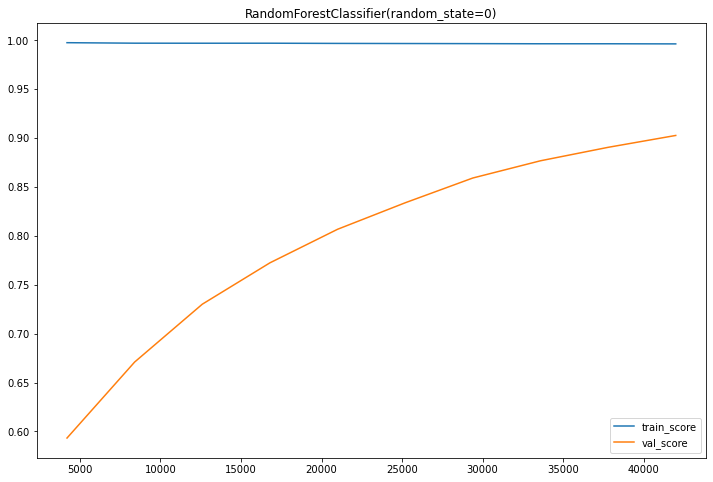

In [201]:
start = time()

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames= ['Classe réelle'], colnames=['Classe predite']),"\n") 
print("-----------------------------------")
print(classification_report(y_test,y_pred))
print("-----------------------------------")
N, train_score, val_score = learning_curve(estimator=model, X = X_train, y = y_train, train_sizes = np.linspace(0.1, 1, 10), cv = 4)
plt.figure(figsize=(12,8))
plt.plot(N,train_score.mean(axis = 1), label = "train_score")
plt.plot(N,val_score.mean(axis = 1), label = "val_score")
plt.title(f"{model}")
plt.legend()

end = time()
print(f"Temps de Calcul: {np.round(end-start,2)} secondes")